In [1]:
# if you installed the nico package 

import nico 
from nico import Annotations as sann
from nico import Interactions as sint
from nico import Covariations as scov

import numpy as np
import os
import matplotlib.pyplot as plt 
from matplotlib.collections import PatchCollection


# if you did not install the nico package and downloaded the nico files into the current directory

#import Annotations as sann
#import Interactions as sint
#import Covariations as scov

#import scanpy as sc
#import gseapy
#import xlsxwriter

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 0.1 #set the value globally

# please use Helvetica font according to your OS to make compatible with Adobe Illustrator. 
#plt.rcParams['font.family'] = 'Helvetica'
#plt.rcParams['font.sans-serif'] = ['Helvetica']

# Use the default font for all the figures 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana']

import warnings
warnings.filterwarnings("ignore")

In [3]:
print(nico.__version__)

1.4.0


### Usage introduction 
For details of the function usage and input parameters either refer to the documentation or <br>
just write the function and add ```.__doc__``` to retrieve infromation on all relelvant parameters.

```print(sann.find_anchor_cells_between_ref_and_query.__doc__)``` <br>
```print(sint.spatial_neighborhood_analysis.__doc__)``` <br>
```print(scov.gene_covariation_analysis.__doc__)``` <br>

All the figures will be saved in `saveas=pdf` format as vector graphics by default. <br>
For every function that generates figures, the following default parameters are used: <br>
transparent_mode=False, saveas='pdf',showit=True, dpi=300 

For saving figures in png format, set saveas='png'  <br> 
For generating images without background, set transparent_mode=True <br>
If figure outputs within the Jupyter Notebook is not desired, set showit=False <br>

Please download the sample data from the [dropbox link](https://www.dropbox.com/scl/fi/6hxyp2pxpxalw9rfirby6/nico_cerebellum.zip?rlkey=9ye6rsk92uj9648ogjw5ypcum&st=lvc8e366&dl=0) and place the data in the following path to complete the tutorial: `nico_cerebellum/cerebellum.h5ad`

NiCoLRdb.txt (Ligand-receptor database file) 

annotation_save_fname= 'cerebellum.h5ad' is the low resolution sequencing-based spatial 
transcriptomics file. <br>
In this anndata object, the adata.X contains the normalize count data, <br>
adata.obsm['spatial'] for spatial coordinates, <br>
adata.obsm['X_umap'] for 2D umap coordinates, <br>
adata.obs['rctd_first_type'] contains the slot for cell type annotations, <br>
and in the adata.raw.X slot contains the raw count matrix.



 

In [4]:
# parameters for saving plots

saveas='png'
transparent_mode=False
dpi=300
showit=True

In [5]:
output_nico_dir='./nico_cerebellum/'
output_annotation_dir=output_nico_dir+'annotations/'
sann.create_directory(output_annotation_dir)

annotation_save_fname= 'cerebellum.h5ad'
#In this anndata .X slot contains the normalize matrix
# and in the .raw.X slot contains the count matrix

In [6]:
# parameters of the nico 
inputRadius=0
annotation_slot='rctd_first_type' #spatial cell type slot 

# Module A: Visualize cell type annotation of spatial data 

The figures are saved:  ./nico_cerebellum/annotations/tissue_and_umap_with_all_celltype_annotations.png


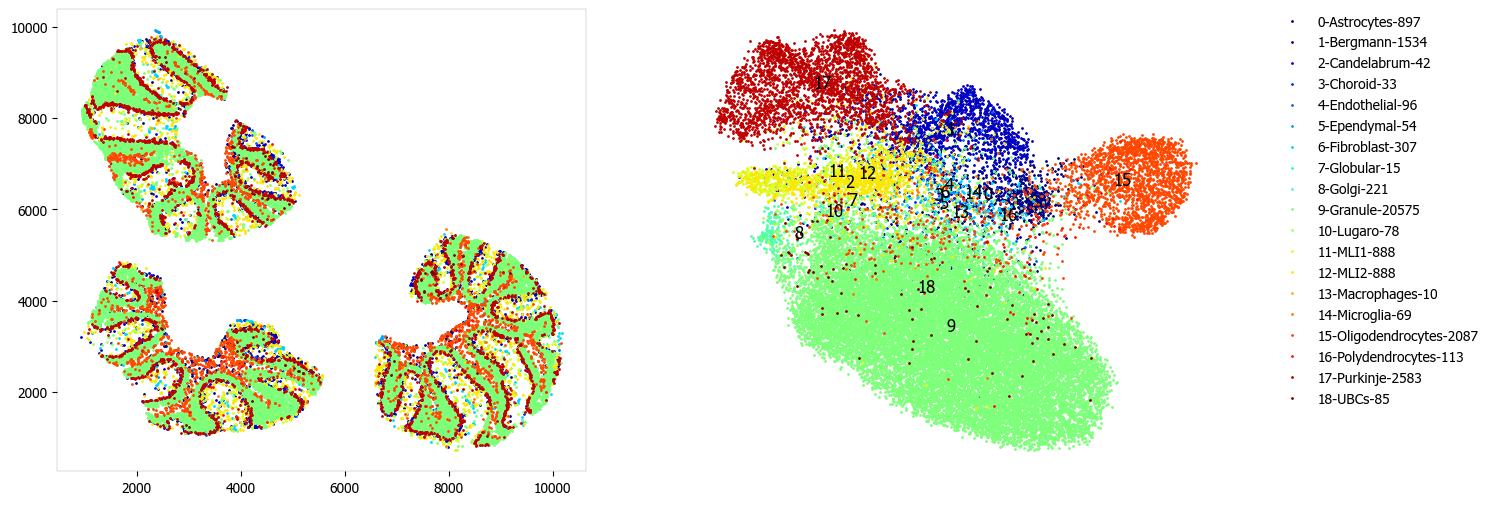

In [7]:
sann.visualize_umap_and_cell_coordinates_with_all_celltypes( 
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,
spatial_coordinate_tag='spatial',
umap_tag='X_umap',showit=showit, 
saveas=saveas,transparent_mode=transparent_mode)

### Visualize  spatial annotations of selected pairs (or larger sets) of cell types  
Left side: tissue map, Right side: UMAP 

The figures are saved:  ./nico_cerebellum/annotations/fig_individual_annotation/Purkinje0.png


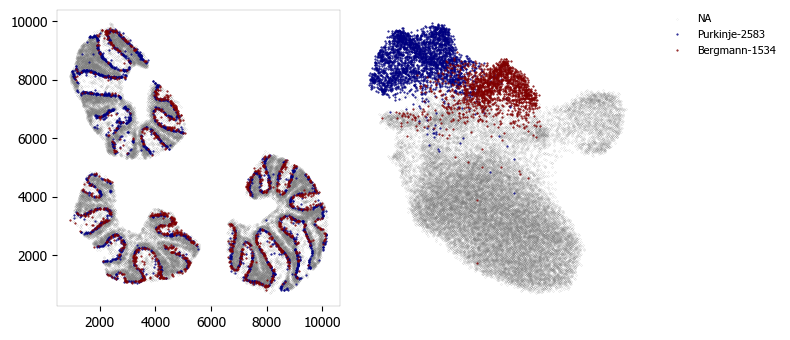

In [8]:
choose_celltypes=[['Purkinje','Bergmann']]

# For visualizing every cell type individually, leave list choose_celltypes empty.
sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,
spatial_coordinate_tag='spatial',
umap_tag='X_umap',showit=showit,
choose_celltypes=choose_celltypes,
saveas=saveas,transparent_mode=transparent_mode)

# Module B: Infer significant niche cell type interactions 

### Radius definition 

If the radius in NiCo is set to R=0, NiCo incorporates the neighboring cells <br>
that are in immediate contact with the central cell to construct the expected <br>
neighborhood composition matrix. We envision NiCo as a method to explore <br>
direct interactions with physical neighbors (R=0), but in principle <br>
finite distance interactions mediated by diffusive factors could be <br>
explored by increasing R and comparing to the interactions obtained with <br>
R=0.

It may be helpful to explore a larger radius if it is expected that cell <br>
types interact through long-range interactions. However, during the <br>
covariation task, immediate neighbors typically capture the strongest <br>
signal, while a larger radius averages the signal from a bigger number of cells, <br> 
potentially diluting the signal. Therefore, we recommend running NiCo with R=0.

Perform neighborhood analysis across direct neighbors (juxtacrine <br>
signaling, R=0) of the central niche cell type by setting inputRadius=0.

To exclude cell types from the neighborhood analysis, add celltype names <br>
to the list removed_CTs_before_finding_CT_CT_interactions. In the <br>
example below, the cell types ``nan``, would not be included.

In [9]:
do_not_use_following_CT_in_niche=['nan']

niche_pred_output=sint.spatial_neighborhood_analysis(
Radius=inputRadius,
output_nico_dir=output_nico_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,
removed_CTs_before_finding_CT_CT_interactions=do_not_use_following_CT_in_niche)


average neighbors: 5.8214227309893705
average distance: 30.979645956596595
data shape (30569, 21) (30569,) neighbor shape (30569, 19)
Searching hyperparameters  Grid method: 0.000244140625
Searching hyperparameters  Grid method: 0.000244140625
Inverse of lambda regularization found 0.000244140625
training (24456, 19) testing (6113, 19) coeff (19, 19)


In [10]:
# this cutoff is use for the visualization of cell type interactions network 
celltype_niche_interaction_cutoff=0.08


In some computing environments, pygraphviz is not able to load the neato package automatically. <br>
In such case please define the location of the neato package.  <br>
If you install pygraphviz through conda ```conda install -c conda-forge pygraphviz``` <br>
then most likely it should work. 

```
import pygraphviz
a=pygraphviz.AGraph()
a._get_prog('neato')

import os
if  not '/home/[username]/miniforge3/envs/SC/bin/' in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + '/home/[username]/miniforge3/envs/SC/bin/'
```

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/Niche_interactions_with_edge_weights_R0.png


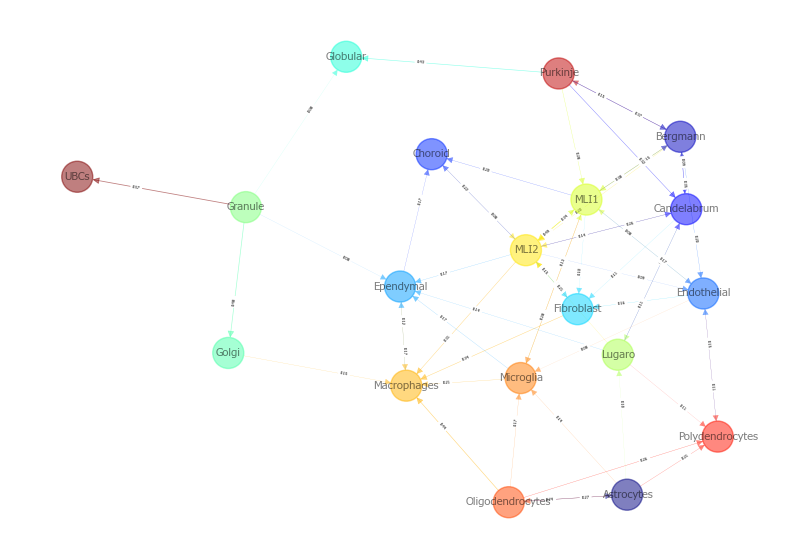

In [11]:

# Plot the niche interaction network with edge weight details for cutoff 0.08

sint.plot_niche_interactions_with_edge_weight(niche_pred_output,
niche_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,
transparent_mode=transparent_mode,
showit=showit,
figsize=(10,7),
dpi=dpi,
input_colormap='jet',
with_labels=True,
node_size=500,
linewidths=1,
node_font_size=8,
alpha=0.5,
font_weight='normal',
edge_label_pos=0.35,   #Relative position of the weight label along the edge. 
edge_font_size=3       #Font size for edge labels.  
)

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/Niche_interactions_without_edge_weights_R0.png


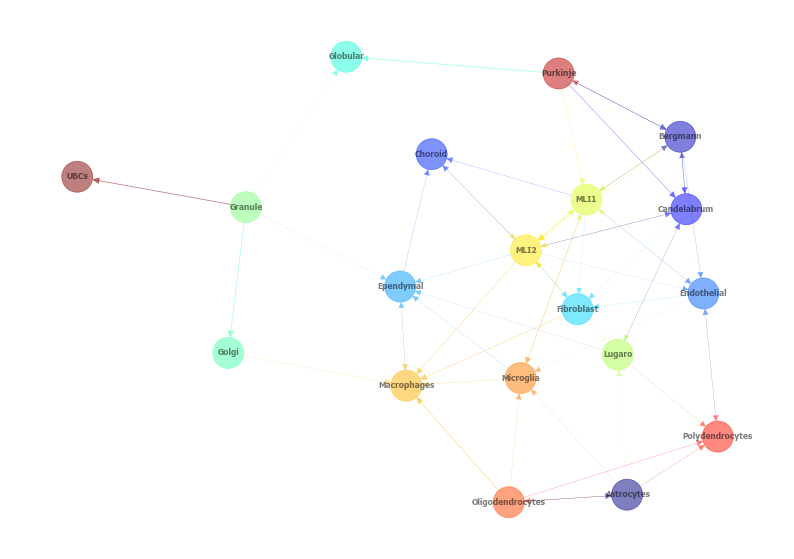

In [12]:
# Plot the niche interaction network without any edge weight details for cutoff 0.08

sint.plot_niche_interactions_without_edge_weight(niche_pred_output,
niche_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,
transparent_mode=transparent_mode,
showit=showit,
figsize=(10,7),
dpi=dpi,                #Resolution in dots per inch for saving the figure.
input_colormap='jet',   #Colormap for node colors, from matplotlib colormaps.
with_labels=True,       #Display cell type labels on the nodes, if True.
node_size=500,          #Size of the nodes. 
linewidths=0.5,         #Width of the node border lines. 
node_font_size=6,       #Font size for node labels.
alpha=0.5,              #Opacity level for nodes and edges. 1 is fully opaque, and 0 is fully transparent. 
font_weight='bold'      #Font weight for node labels; 'bold' for emphasis, 'normal' otherwise. 
)


## Individual cell type niche plot

To plot regression coefficients of niche cell types for given central cell types, ordered by magnitude, <br>
add cell type names for the desired central cell types to the list argument choose_celltypes (e.g. Purkinje <br>
and Bergmann cells).

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/TopCoeff_R0/Rank2_Purkinje.png
The figures are saved:  ./nico_cerebellum/niche_prediction_linear/TopCoeff_R0/Rank6_Bergmann.png


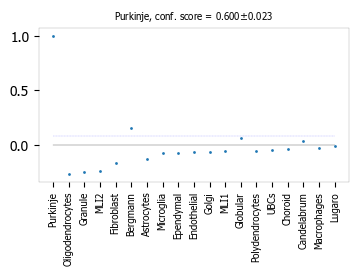

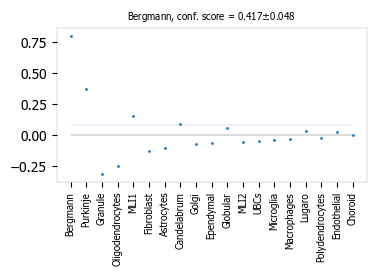

In [13]:
# Blue dotted line in following plot is celltype_niche_interaction_cutoff

sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=['Purkinje','Bergmann'],
celltype_niche_interaction_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,figsize=(4.0,2.0))



If niche cell types from the niche neighborhood of all central cell <br>
types should be plotted or saved, then leave the choose_celltypes list <br>
argument empty.

In [14]:
#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

In [15]:
# Plot the ROC curve of the classifier prediction for one of the cross-folds. 
# sint.plot_roc_results(niche_pred_output,saveas=saveas,transparent_mode=transparent_mode)

Plot the average confusion matrix of the classifier from cross-folds:

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/Confusing_matrix_R0.png


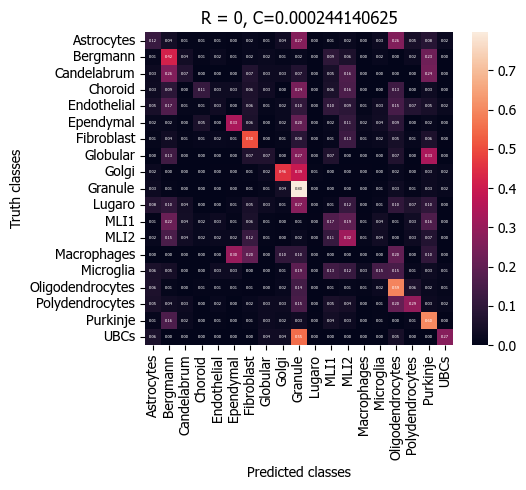

In [16]:
sint.plot_confusion_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode,showit=showit)

Plot the average coefficient matrix of the classifier from cross-folds:

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/weight_matrix_R0.png


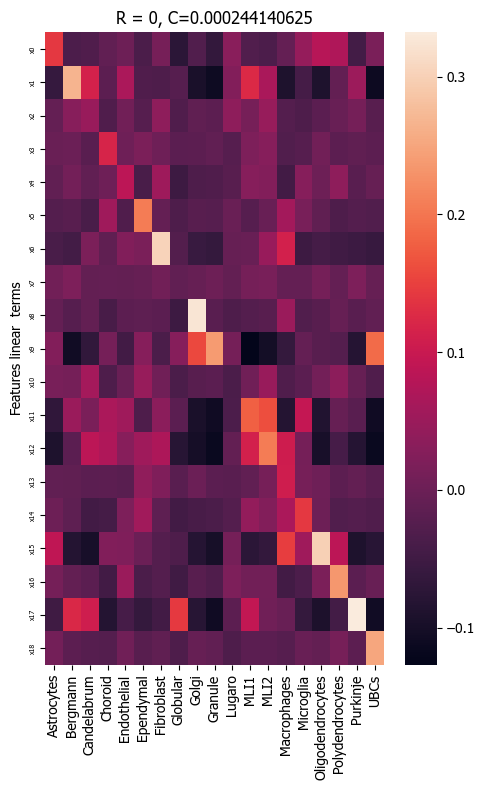

In [17]:
sint.plot_coefficient_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode,showit=showit)

In [18]:
#st.plot_predicted_probabilities(niche_pred_output)

Plot the evaluation score of the classifier for different metrics:

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/scores_0.png


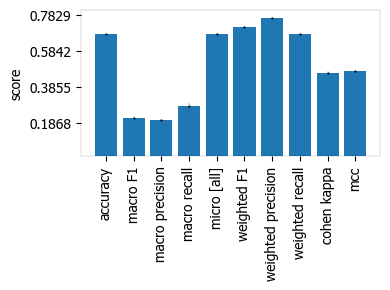

In [19]:
sint.plot_evaluation_scores(niche_pred_output, 
saveas=saveas, transparent_mode=transparent_mode, showit=showit,figsize=(4,3))

# Module C:  Perform niche cell state covariation analysis using latent factors

Note: From module C onwards, Jupyter cells are independent of previous steps. <br> 
Therefore, if you want to try different settings, you do not need to run the previous Jupyter cells.

### Covariation parameters settings 

Infer desired number of latent factors (e.g., no_of_factors=3) for each <br>
cell type. Here, we consider only the spatial modality and thus use conventional <br>
non-negative matrix factorization.

Set spatial_integration_modality=‘single’ for applying the conventional <br>
non-negative matrix factorization method on unimodal spatial data <br>
without integration.

In this case, latent factors will be derived from the spatial data <br>
alone.

### Ligand-Receptor database file 
NiCoLRdb.txt is the name of the ligand-receptor database file. Users can <br>
use databases of similar format from any resource.

NiCoLRdb.txt was created by merging ligand-receptor pairs from NATMI, <br>
OMNIPATH, and CellPhoneDB. It can be downloaded from github <br>
and saved in the local directory from where this notebook is run.


In [20]:
# By default, the function is run with spatial_integration_modality='double', i.e. 
# it integrates spatial transcriptomics with scRNAseq data
# For running it only on spatial transcriptomics data, specify 
# spatial_integration_modality='single'

cov_out=scov.gene_covariation_analysis(Radius=inputRadius,
no_of_factors=3,
spatial_integration_modality='single',
anndata_object_name=annotation_save_fname,
output_niche_prediction_dir=output_nico_dir,
ref_cluster_tag=annotation_slot,LRdbFilename='NiCoLRdb.txt')



common genes between sc and sp 5160 5160


 Spatial and scRNA-seq number of clusters, respectively  19 19
Common cell types between spatial and scRNA-seq data   19 {'Bergmann', 'MLI2', 'Endothelial', 'Golgi', 'Polydendrocytes', 'Astrocytes', 'MLI1', 'Ependymal', 'Lugaro', 'Globular', 'Oligodendrocytes', 'Candelabrum', 'Fibroblast', 'Macrophages', 'Microglia', 'UBCs', 'Granule', 'Purkinje', 'Choroid'}

The spatial cluster name does not match the scRNA-seq cluster name  set()
If the above answer is Null, then everything is okay. However, if any spatial cell type does not exist in the scRNA-seq data, please correct this manually; otherwise, NiCo will not run. 



Astrocytes alpha, H size, W size, spH size: 0 (3, 897) (4676, 3) (3, 897)
Bergmann alpha, H size, W size, spH size: 0 (3, 1534) (4802, 3) (3, 1534)
Candelabrum alpha, H size, W size, spH size: 0 (3, 42) (2823, 3) (3, 42)
Choroid alpha, H size, W size, spH size: 0 (3, 33) (2079, 3) (3, 33)
Endothelial alpha, H size, W size, spH si

### Visualize the cosine similarity and Spearman correlation between genes and latent factors 

The following function generates output for the top 30 genes based on cosine <br>
similarity (left) or Spearman correlation (right) with latent factors.

Select cell types by adding IDs to the list argument choose_celltypes, or <br>
leave empty for generating output for all cell types.

cell types found  ['Bergmann']
The figures are saved:  ./nico_cerebellum/covariations_R0_F3/NMF_output/Bergmann.png


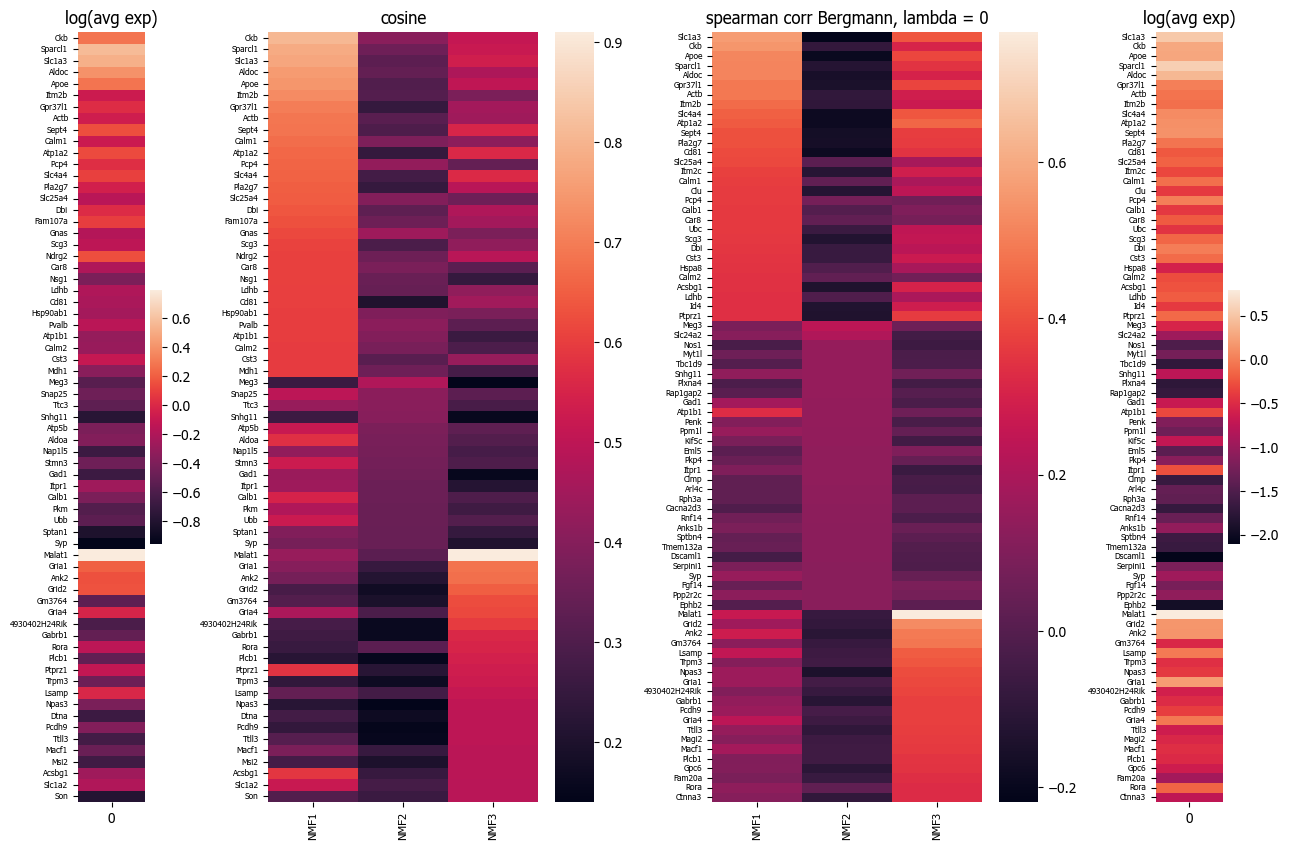

In [21]:
scov.plot_cosine_and_spearman_correlation_to_factors(cov_out,
choose_celltypes=['Bergmann'],
NOG_Fa=30,showit=showit,dpi=dpi,
saveas=saveas,transparent_mode=transparent_mode,
figsize=(15,10))

### Visualizes genes associated with the latent factors along with average expression 

Call the following function <br>
(scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype) to <br>
visualize correlation and expression of genes associated with factors <br>

For example, visualize and extract the top 20 genes (top_NOG=20) <br>
correlating negatively (positively_correlated=False) by Spearman <br>
correlation (correlation_with_spearman=True) for cell type Purkinje <br>
(choose_celltype=‘Purkinje’) to factor 1 (choose_factor_id=1)

The figures are saved:  ./nico_cerebellum/covariations_R0_F3/dotplots/Factors_Purkinje.png


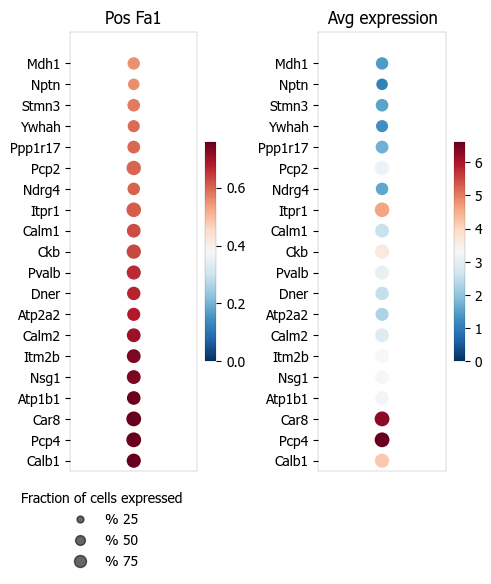

In [22]:
dataFrame=scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype(cov_out,
choose_celltype='Purkinje',
choose_factor_id=1,
top_NOG=20,correlation_with_spearman=True,positively_correlated=True,
saveas=saveas,transparent_mode=transparent_mode, showit=showit, dpi=dpi )

### Inspect genes associated with a latent factor 

Inspect the top genes associated with a the given factor. The table summarizes the <br>
positive or negative spearman correlation or cosine similarity with the factor, the mean <br>
expression and the proportion of cells expressing the gene for the respective cell type.

In [23]:
dataFrame

,Gene,Fa,mean_expression,proportion_of_population_expressed
0,Calb1,0.758210,4.204801,0.844367
1,Pcp4,0.757111,6.616725,0.932249
2,Car8,0.756901,6.302749,0.934959
3,Atp1b1,0.752535,3.228417,0.773906
4,Nsg1,0.735999,3.327526,0.803329
5,Itm2b,0.735834,3.303136,0.802555
6,Calm2,0.702097,2.882307,0.795587
7,Atp2a2,0.681419,2.284940,0.708866
8,Dner,0.670894,2.528068,0.749129
9,Pvalb,0.661823,3.056523,0.839334


### Save the latent factors into an excel sheet
Save data in an excel sheet for each cell type, including latent factor <br>
associations of all genes according to Spearman correlation and cosine <br>
similarity.

In [24]:
scov.make_excel_sheet_for_gene_correlation(cov_out)

# Module D: Cell type covariation visualization 

Plot linear regression coefficients between factors of the central cell type (y-axis, <br>
defined by list argument choose_celltypes) and factors of niche cell types (x-axis).

Circle size scales with -log10(p-value) (indicated as number on top of <br>
each circle). To generate plots for all cell types, leave list argument <br>
choose_celltypes empty.

cell types found  ['Bergmann']
The regression figures as pvalue circle plots are saved in following path  ./nico_cerebellum/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


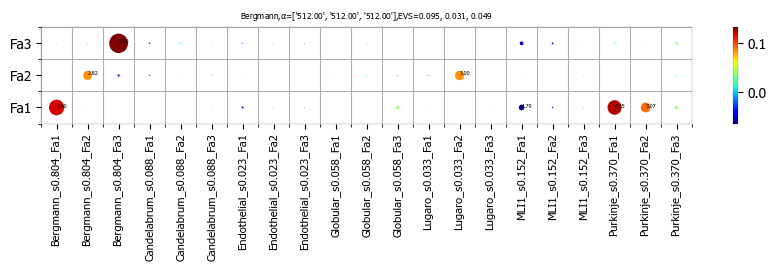

In [25]:

scov.plot_significant_regression_covariations_as_circleplot(cov_out,
choose_celltypes=['Bergmann'],
pvalue_cutoff=0.05,mention_pvalue=True, dpi=dpi, showit=showit,
saveas=saveas,transparent_mode=transparent_mode,
figsize=(6,1.25))

# In the following example, a p-value cutoff is explicitely defined by the pvalue_cutoff argument.
# p-value is printed as the -log10(p-value) on top of circle.
# circle color is the regression coefficients 

In [26]:
#function to print the sizebar of pvalue circle size  

def print_pvalue_sizebar(number_of_dots_to_print=3, gray_level=0.5,
savepath='./',saveas='pdf',showit=True,
transparent_mode=False,dpi=300):

    if number_of_dots_to_print==3:
        value2print=[10,6,2]
        width=0.8
        shift=0.15
    if number_of_dots_to_print==5:
        value2print=[10,8,6,4,2]
        width=0.639
        shift=0.25
    if number_of_dots_to_print==4:
        value2print=[10,7.5,5,2.5]
        width=0.725
        shift=0.2
    fig, ax = plt.subplots(1,1,figsize=(width,1.25))
    pvalue=np.zeros((len(value2print),1))
    c=np.ones((len(value2print),1))
    for i in range(len(value2print)):
        pvalue[i][0]=value2print[i]
    M=pvalue.shape[1]
    N=pvalue.shape[0]
    x, y = np.meshgrid(np.arange(M), np.arange(N))
    R = pvalue/10.0/2
    maxp=pvalue.max()
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap='gray',alpha=gray_level)#cmap="RdYlGn")
    ax.add_collection(col)
    ax.set_axis_off()
    ax.set(xticks=np.arange(M), yticks=np.arange(N))
    ax.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax.grid(which='minor')
    for i in range(len(value2print)):
        ax.text(0.5,i-shift,str(value2print[i]))
    
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    fig.tight_layout()
    #print(saveas,savepath+'pvalue_cirlce_sizebar'+saveas)
    fig.savefig(savepath+'pvalue_cirlce_sizebar.'+saveas,bbox_inches='tight',transparent=transparent_mode, dpi=dpi)
    if showit:
        pass
    else:
        plt.close('all')



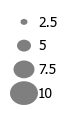

In [27]:
print_pvalue_sizebar(number_of_dots_to_print=4,gray_level=0.5,savepath=output_nico_dir,
saveas='pdf',transparent_mode=transparent_mode,showit=showit,dpi=dpi)

### Visualize as heatmap instead of circle plot 

Plot regression coefficients between niche cell types (x-axis) and central cell <br>
type (y-axis, defined by list argument choose_celltypes) as heatmap.

Leave list argument choose_celltypes empty to generate plots for all <br>
cell types. The top subfigure shows the coefficients and bottom subfigure <br>
shows the -log10 p-values.

cell types found  ['Bergmann']
The regression figures as pvalue heatmap plots are saved in following path  ./nico_cerebellum/covariations_R0_F3/Regression_outputs/pvalue_coeff_heatmap_*


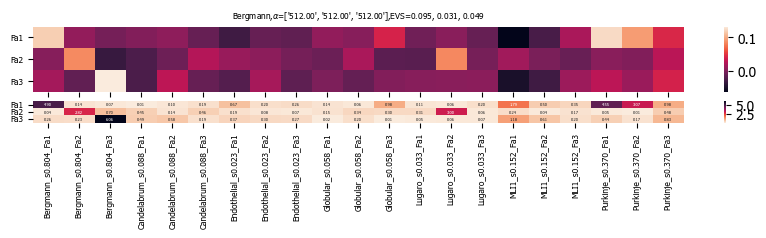

In [28]:
scov.plot_significant_regression_covariations_as_heatmap(cov_out,
choose_celltypes=['Bergmann'], showit=showit,
saveas=saveas,transparent_mode=transparent_mode, figsize=(6,1.25))


# Module E: Analysis of ligand-receptor interactions between covarying niche cell types

### Save excel sheets and summary in text file

Save all ligand-receptor interactions infered for the niche of each cell <br>
type in an excel sheet, and a summary of significant niche <br>
interactions in a text file.


In [29]:
scov.save_LR_interactions_in_excelsheet_and_regression_summary_in_textfile_for_interacting_cell_types(cov_out,
pvalueCutoff=0.05,correlation_with_spearman=True,
LR_plot_NMF_Fa_thres=0.1,LR_plot_Exp_thres=0.1,number_of_top_genes_to_print=5)


The Excel sheet is saved:  ./nico_cerebellum/covariations_R0_F3/Lig_and_Rec_enrichment_in_interacting_celltypes.xlsx
The text file is saved: ./nico_cerebellum/covariations_R0_F3/Regression_summary.txt


### Usage for ligand-receptor visualizations 
Perform ligand-receptors analysis In this example, output is generated <br>
for the ligand-receptor pairs associated with the intercting factor 1 of <br>
Bergmann cells and factor 1 of Purkinje cells.

choose_interacting_celltype_pair=[‘Bergmann’,‘Purkinje’]

choose_factors_id=[1,1] entries correspond to cell types in <br>
choose_interacting_celltype_pair, i.e., first factor ID corresponds to <br>
Bergmann and second factor ID corresponds to Purkinje.

By default, the analysis is saved in 3 separate figures (bidirectional, <br>
CC to NC and NC to CC). CC: central cell NC: niche cell

Our analysis accounts for bidirectional cellular crosstalk interactions <br>
of ligands and receptors in cell types A and B. The ligand can be <br>
expressed on cell type A and signal to the receptor detected on cell <br>
type B, or vice versa.

By changing the cutoff for minimum factor correlation of ligand/receptor <br>
genes (LR_plot_NMF_Fa_thres=0.2) or the cutoff for the minimum fraction <br>
of cells expressing the ligand/receptor genes (LR_plot_Exp_thres=0.2) <br>
the stringency of the output filtering can be controled.

LR figures for both ways are saved in following path  ./nico_cerebellum/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./nico_cerebellum/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./nico_cerebellum/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


0

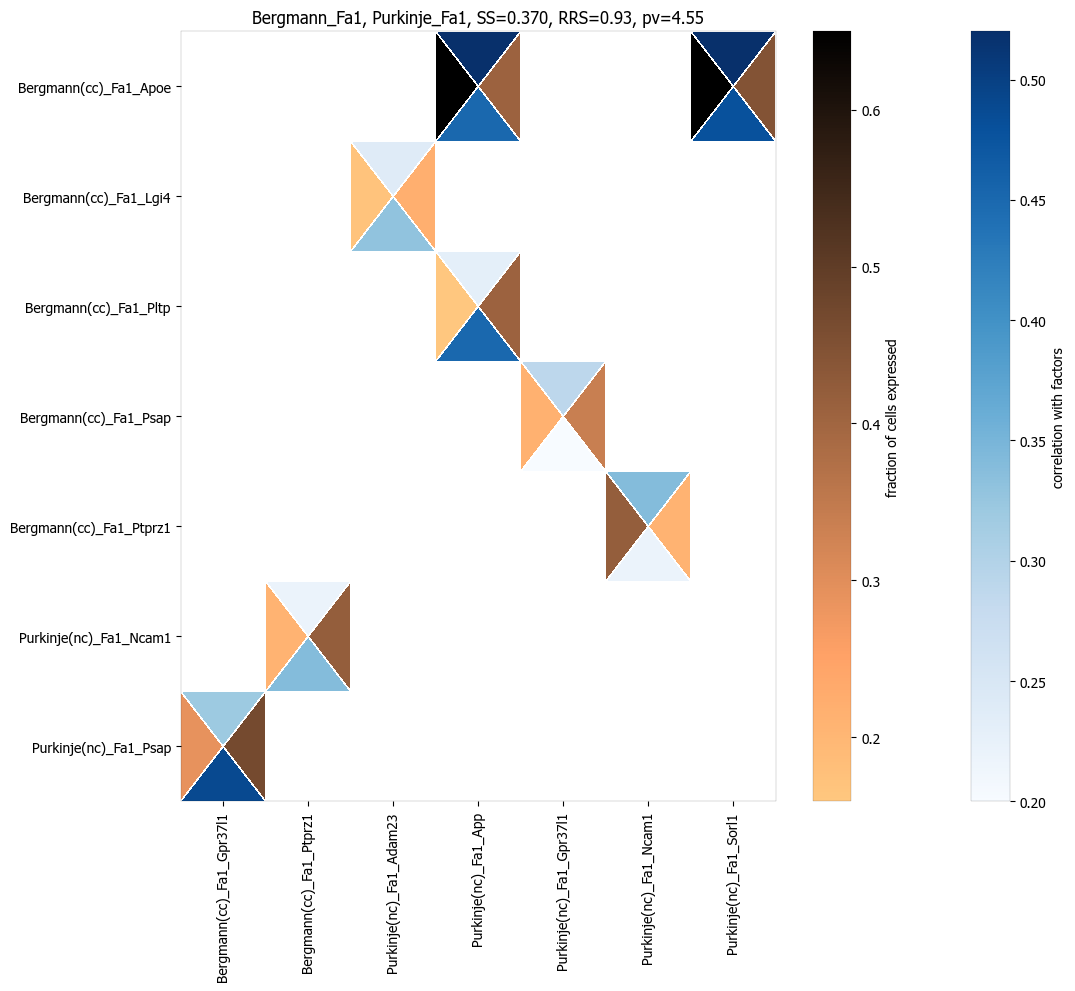

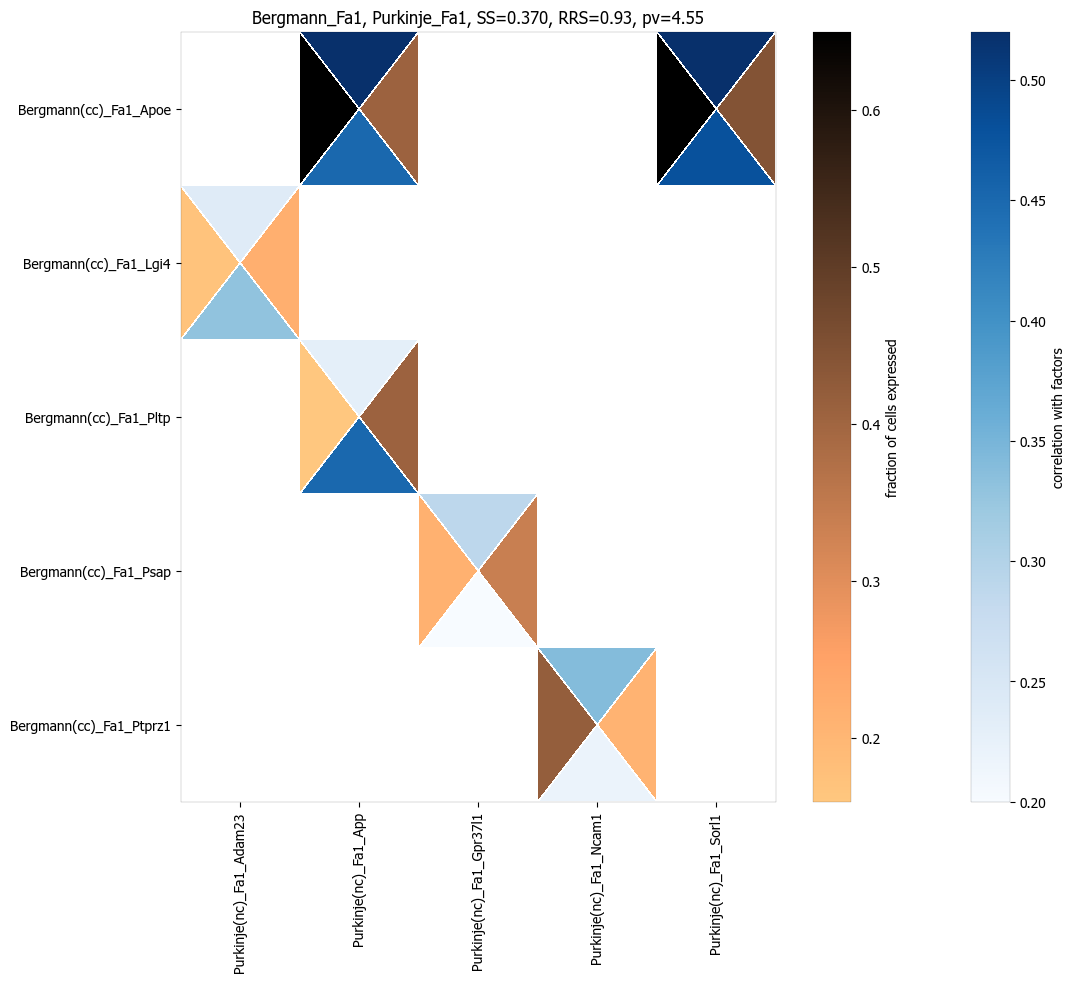

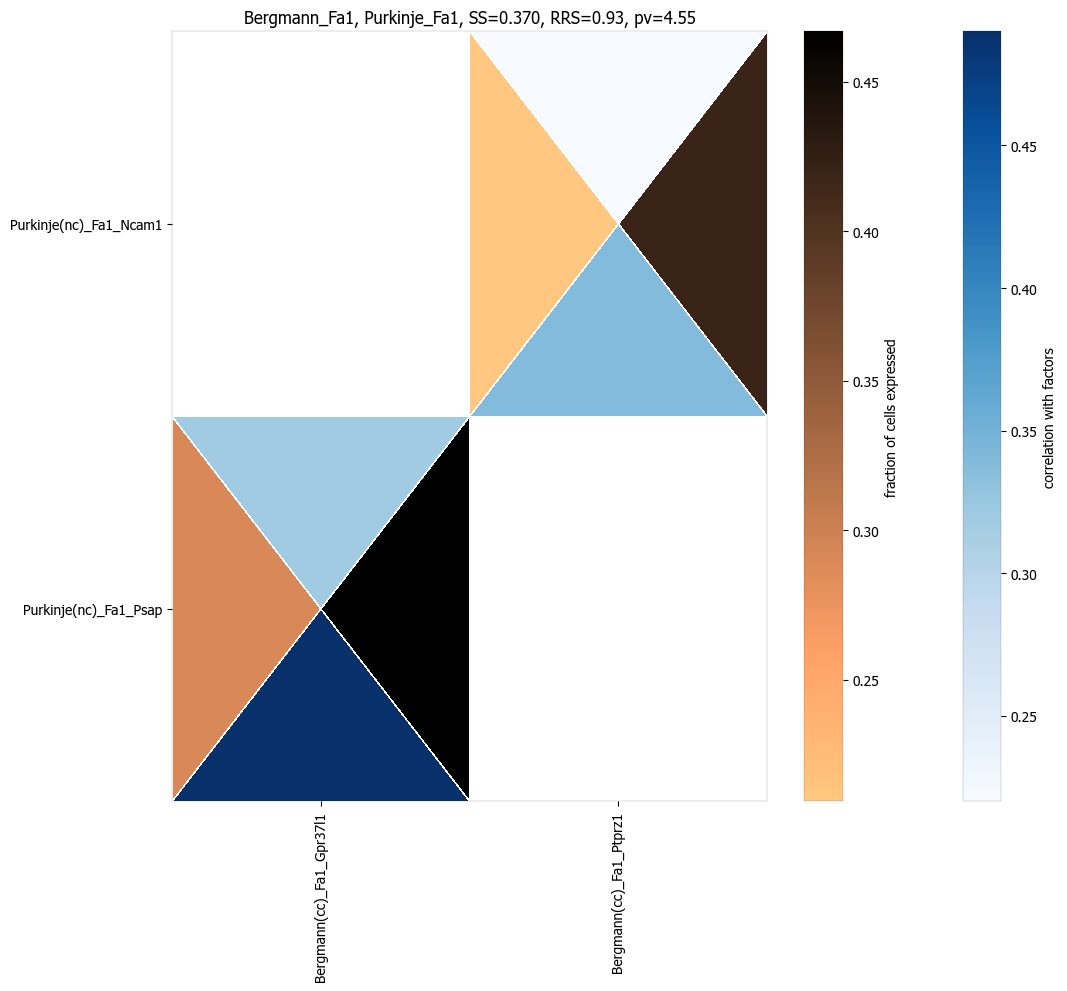

In [30]:
scov.find_LR_interactions_in_interacting_cell_types(cov_out,
choose_interacting_celltype_pair=['Bergmann','Purkinje'],
choose_factors_id=[1,1],
pvalueCutoff=0.05,
LR_plot_NMF_Fa_thres=0.15,
LR_plot_Exp_thres=0.15,showit=showit,dpi=dpi,
saveas=saveas,transparent_mode=transparent_mode,figsize=(12, 10))

Perform ligand-receptors analysis of the Bergmann cell niche including <br>
all significant interaction partners.

choose_interacting_celltype_pair=[‘Bergmann’] generates plots for all <br>
cell types interacting sigificantly with Bergmann cells.

choose_factors_id=[] if empty, generates plots for all significantly <br>
covarying factors

In [31]:
# scov.find_LR_interactions_in_interacting_cell_types(all_output_data,choose_interacting_celltype_pair=['Bergmann'],
#   choose_factors_id=[], LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2,saveas=saveas,transparent_mode=transparent_mode)


# Module F: Perform functional enrichment analysis for genes associated with latent factors

### Perform pathway enrichment analysis for factor-associated genes

In this example, pathway analysis is performed for the top 50 <br>
(NOG_pathway=50) genes, positively correlated <br>
(positively_correlated=True) with factor 1 (choose_factors_id=[1]) of <br>
Bergmann cells (choose_celltypes=[‘Bergmann’]) testing for enrichment of <br>
Bioplanet 2019 (database=[‘BioPlanet_2019’]).

If savefigure=True, then the figures will be saved in the respective <br>
folder.

The pathway figures are saved in  ./nico_cerebellum/covariations_R0_F3/Pathway_figures/
cell types found  ['Bergmann']


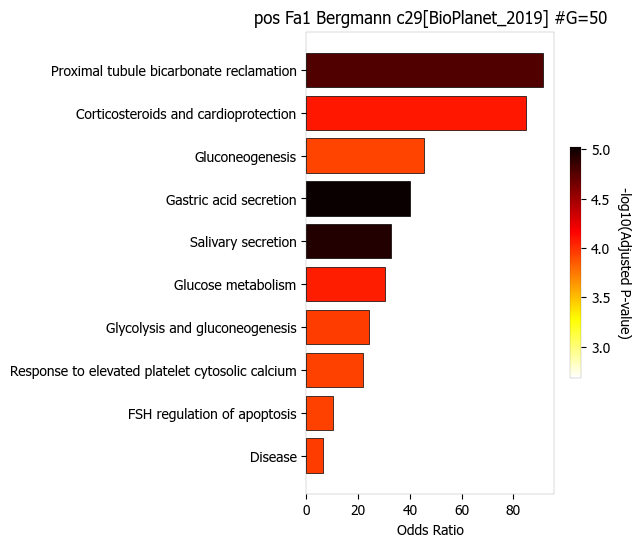

In [32]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Bergmann'],
NOG_pathway=50,
showit=showit,                       
choose_factors_id=[1],
positively_correlated=True,
display_plot_as='barplot',
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
savefigure=False,database=['BioPlanet_2019'])

In this example, pathway analysis is performed for the top 50 <br>
(NOG_pathway=50) genes, postively correlated <br>
(positively_correlated=True) with factor 1 (choose_factors_id=[1]) of <br>
Purkinje cells (choose_celltypes=[‘Purkinje']) testing for enrichment of <br>
GO Biological Processes (database=[‘BioPlanet_2019’]).

If savefigure=True, then the figures will be saved in the respective <br>
folder.

The pathway figures are saved in  ./nico_cerebellum/covariations_R0_F3/Pathway_figures/
cell types found  ['Purkinje']


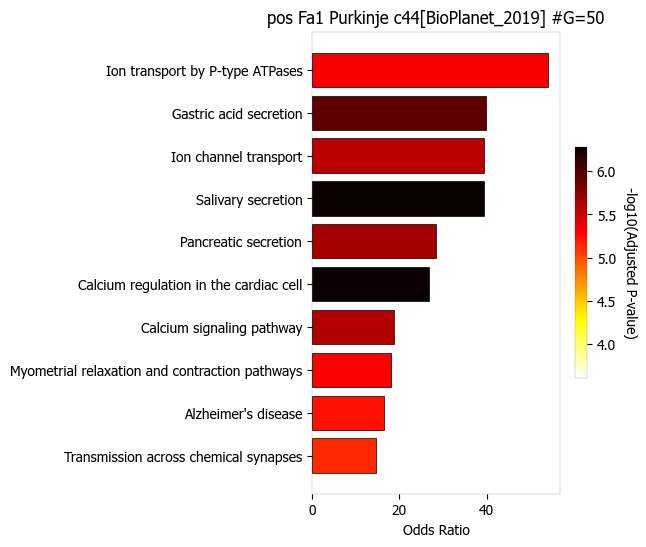

In [33]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Purkinje'],
NOG_pathway=50,
choose_factors_id=[1],
showit=showit,
positively_correlated=True,
display_plot_as='barplot',
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
savefigure=False,database=['BioPlanet_2019'])

# Module G: Visualization of top genes across cell types and factors as dotplot

Show the top 20 positively and negatively correlated genes (top_NOG=20) to <br>
the factors in visualize_factors_id and their average expression on a log scale for <br> 
corresponding cell types indicated in choose_interacting_celltype_pair. <br>
In this example, plots are generated for factor 1 for Purkinje cells and factor 1 <br>
for Bergmann cells.

If the choose_celltypes=[], the plot will be generated for all cell types. 

The figures are saved:  ./nico_cerebellum/covariations_R0_F3/dotplots/combined_Purkinje_Bergmann.png


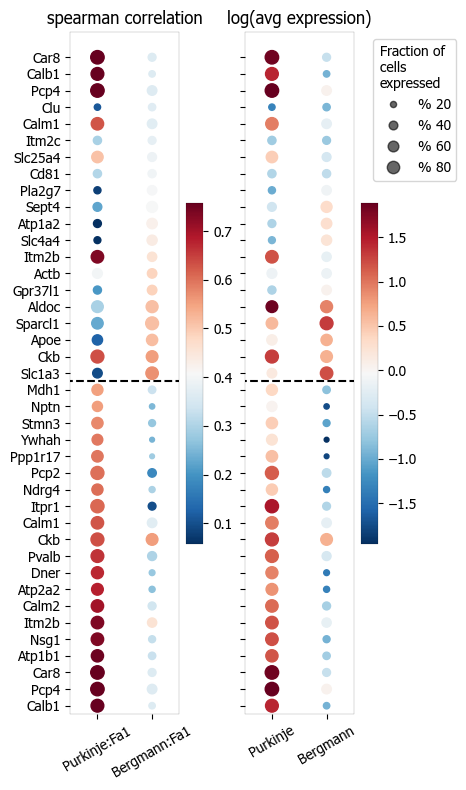

In [34]:
scov.plot_top_genes_for_pair_of_celltypes_from_two_chosen_factors(cov_out,
choose_interacting_celltype_pair=['Purkinje','Bergmann'],
visualize_factors_id=[1,1],showit=showit,dpi=dpi,
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode)

cell types found  ['Bergmann', 'Purkinje']
The figures are saved:  ./nico_cerebellum/covariations_R0_F3/dotplots/Bergmann.png
The figures are saved:  ./nico_cerebellum/covariations_R0_F3/dotplots/Purkinje.png


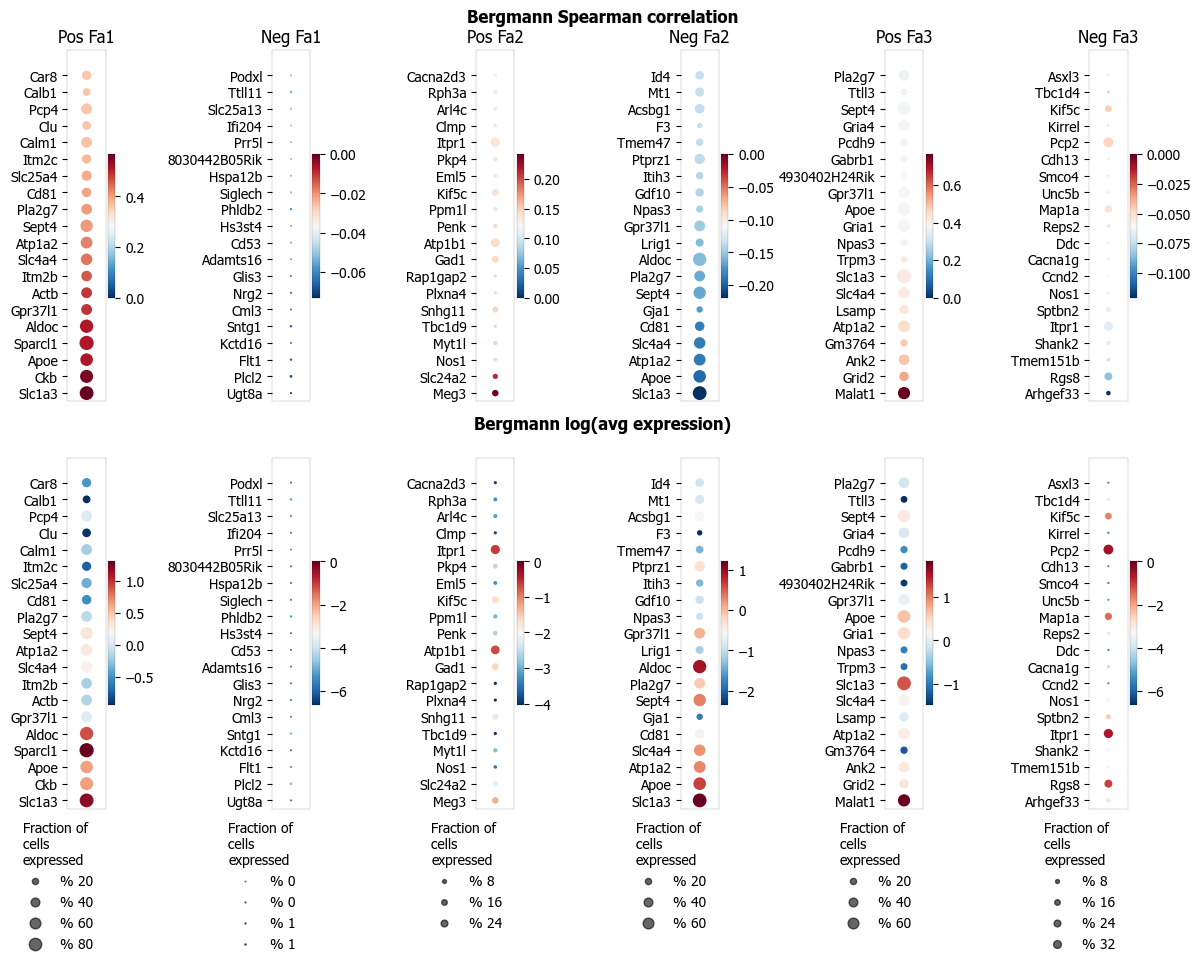

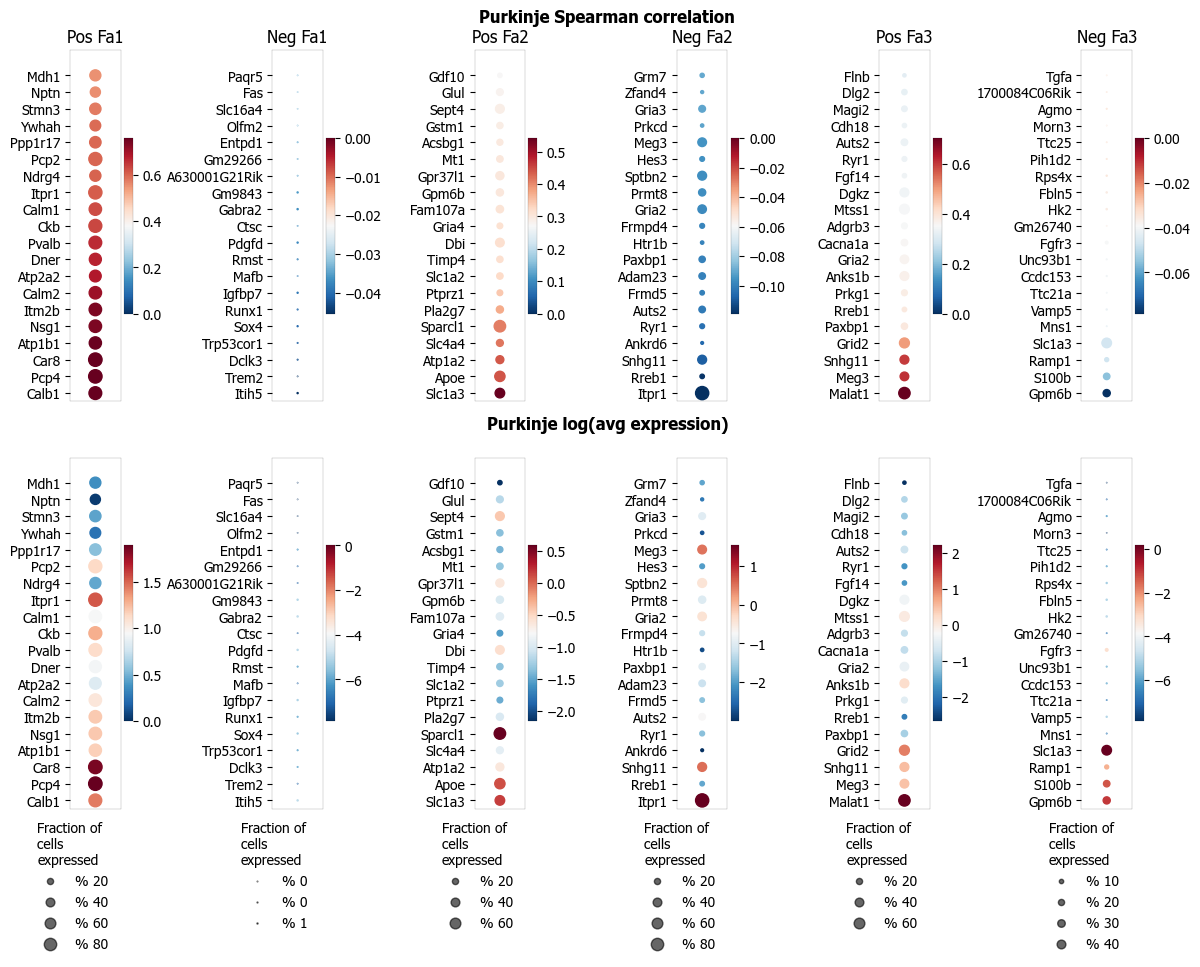

In [35]:


scov.plot_top_genes_for_a_given_celltype_from_all_factors(cov_out,
choose_celltypes=['Bergmann','Purkinje'],showit=showit,dpi=dpi,
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode)



# Module H: Visualize factor values in the UMAP

Visualize factor values for select cell types, e.g., Bergmann and Purkinje <br>
cells (choose_interacting_celltype_pair=['Bergmann','Purkinje']) in <br>
scRNA-seq data umap. Select factors for each cell type <br>
(visualize_factors_id=[1,1]).


The figures are saved:  ./nico_cerebellum/covariations_R0_F3/spatial_factors_in_umap.png


0

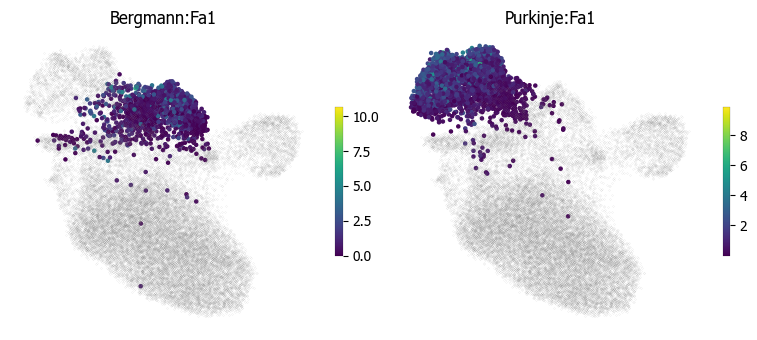

In [36]:
scov.visualize_factors_in_spatial_umap(cov_out,
visualize_factors_id=[1,1],
umap_tag='X_umap',
choose_interacting_celltype_pair=['Bergmann','Purkinje'],showit=showit,dpi=dpi,
saveas=saveas,transparent_mode=transparent_mode,figsize=(8,3.5))


The figures are saved:  ./nico_cerebellum/covariations_R0_F3/spatial_factors_in_umap.png


0

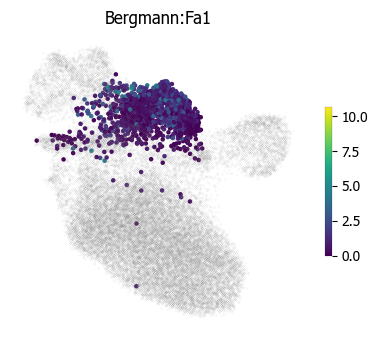

In [37]:
scov.visualize_factors_in_spatial_umap(cov_out,
visualize_factors_id=[1],
umap_tag='X_umap',
choose_interacting_celltype_pair=['Bergmann'],showit=showit,dpi=dpi, 
saveas=saveas,transparent_mode=transparent_mode,figsize=(4,3.5))